In [20]:
import numpy as np
from random import shuffle
from copy import copy

In [95]:
Samps = 10
N = 5
ddl = 3

In [110]:
ddxs = []
for i in range(Samps):
    ddx = range(N)
    shuffle(ddx)
    ddxs.append(ddx)
ddxs

[[3, 1, 0, 2, 4],
 [3, 4, 1, 0, 2],
 [3, 1, 4, 2, 0],
 [1, 4, 2, 3, 0],
 [3, 0, 4, 2, 1],
 [1, 2, 4, 0, 3],
 [0, 1, 4, 3, 2],
 [2, 1, 3, 4, 0],
 [0, 2, 4, 3, 1],
 [4, 3, 2, 1, 0]]

In [99]:
A = np.tile(np.eye(N)[:,:,np.newaxis]-np.eye(N)[:,np.newaxis,:],[Samps,1,1,1])
for n in range(Samps):
    for i in range(N):
        for j in range(N):
            for k in range(N):
                if k == i and i!=j:
                    assert(A[n,k,i,j]==1)
                elif k == j and i!=j:
                    assert(A[n,k,i,j]==-1)
                else:
                    assert(A[n,k,i,j]==0)


In [100]:
ddxs = np.array(ddxs)
A_shuff = A[np.arange(Samps)[:,np.newaxis,np.newaxis,np.newaxis],
            np.arange(N)[np.newaxis,:,np.newaxis,np.newaxis],
            ddxs[:,np.newaxis,:,np.newaxis],
            ddxs[:,np.newaxis,np.newaxis,:]]

In [101]:
for n in range(Samps):
    for i in range(N):
        for j in range(N):
            for k in range(N):
                assert(A_shuff[n,k,i,j]==A[n,k,ddxs[n,i],ddxs[n,j]])

In [102]:
A_shuff.shape

(10, 5, 5, 5)

In [74]:
A_shuff

array([[[ 0.,  1.,  1.,  1.,  1.],
        [-1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.]],

       [[ 0., -1.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  1.,  1.],
        [ 0., -1.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0., -1.],
        [ 0.,  0.,  0.,  0., -1.],
        [ 0.,  0.,  0.,  0., -1.],
        [ 0.,  0.,  0.,  0., -1.],
        [ 1.,  1.,  1.,  1.,  0.]],

       [[ 0.,  0., -1.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.],
        [ 1.,  1.,  0.,  1.,  1.],
        [ 0.,  0., -1.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.]],

       [[ 0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0., -1.,  0.],
        [ 1.,  1.,  1.,  0.,  1.],
        [ 0.,  0.,  0., -1.,  0.]]])

In [76]:
A[0,:,:,:]==A_shuff

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True, False,  True, False],
        [ True,  True, False,  True, False],
        [False, False,  True, False, False],
        [ True,  True, False,  True, False],
        [False, False, False, False,  True]],

       [[ True,  True, False, False,  True],
        [ True,  True, False, False,  True],
        [False, False,  True, False, False],
        [False, False, False,  True, False],
        [ True,  True, False, False,  True]],

       [[ True,  True,  True, False, False],
        [ True,  True,  True, False, False],
  

In [106]:
from itertools import ifilterfalse
ddx = [3,5]
l = list(ifilterfalse(ddx.__contains__,range(10)))
l

[0, 1, 2, 4, 6, 7, 8, 9]

In [108]:
findings = np.zeros(10)
findings[ddx]=1
findings

array([ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.])

In [112]:
A.shape

(10, 5, 5, 5)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [11]:
x = np.arange(-10,10,0.1)
y = -np.log(1+np.exp(-x))
y2 = (1+np.exp(x))/(1+np.exp(-x))
y3 = np.log(y2)

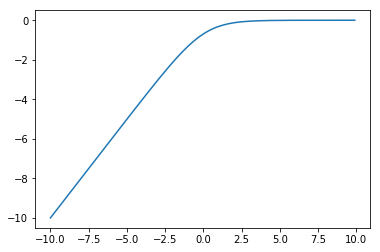

In [8]:
plt.plot(x,y)
plt.show()

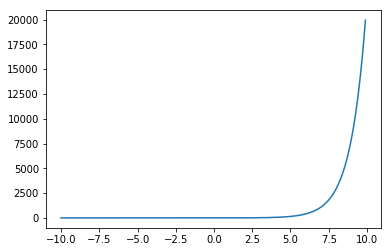

In [10]:
plt.plot(x,y2)
plt.show()

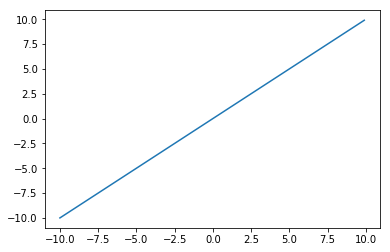

In [12]:
plt.plot(x,y3)
plt.show()

In [19]:
z = 1
sig = 1./(1+np.exp(-x))
y4 = z*np.log(sig)+(1-z)*np.log(1-sig)
y5 = z*x+np.log(1-sig)

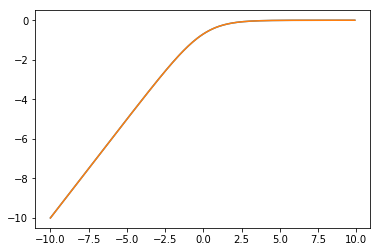

In [20]:
plt.plot(x,y4)
plt.plot(x,y5)
plt.show()

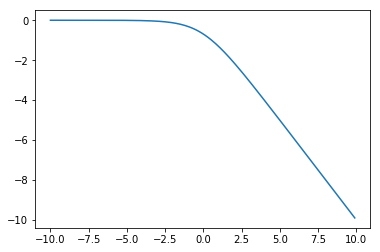

In [22]:
plt.plot(x,np.log(1-sig))